# Gradient Descent with Logistic Regression - Example Default Data

## Predicting default on loans

Suppose we want to predict whether someone will default on their loan based on their income and the amount that they borrowed.

We will look at the dataset Default-Data which has three columns:  the first column is the loan amount, the second column is income, and the third column is the status of the loan.  

If the borrower has defaulted on their loan, we mark their status with a 1 in that column.  If the borrower has not defaulted on their loan, we mark their status as 0.

## Data

In [ ]:
#------------------------
# Import packages
#------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import norm

# Plot style
plt.style.use('seaborn-whitegrid')

#------------------------
# Make dataframe
#------------------------

# Creates a dataframe from file called Default-Data.csv
#---------------------
url = 'https://raw.githubusercontent.com/cedholm/Gradient-descent-methods-in-machine-learning/main/Lesson_4/Default-Data.csv'
dfLoans = pd.read_csv(url)

# Print some info about the dataset
#---------------------

# Prints first 5 lines of data
print('The first 5 lines of data look like:\n', dfLoans.head(5))

# Print basic stats on data
print('Some basic stats on our data are:\n', dfLoans.describe())

The first 5 lines of data look like:
    loan_amount  income  status
0       516500    9600       0
1       126500    1740       0
2       216500    3420       0
3       266500    5400       0
4       276500    5160       0
Some basic stats on our data are:
         loan_amount         income        status
count  1.000000e+04   10000.000000  10000.000000
mean   3.330090e+05    6929.292000      0.119600
std    1.871450e+05    5397.180336      0.324509
min    2.650000e+04       0.000000      0.000000
25%    1.965000e+05    3780.000000      0.000000
50%    2.965000e+05    5820.000000      0.000000
75%    4.365000e+05    8460.000000      0.000000
max    3.006500e+06  114900.000000      1.000000


## Create plots
Let us plot our data with the x-axis displaying the borrower's loan amount, the y-axis the borrower's income, and the color of the data representing the borrower's status.  Recall that 0 means the borrower has not defaulted on their loan and 1 means that they have defaulted.

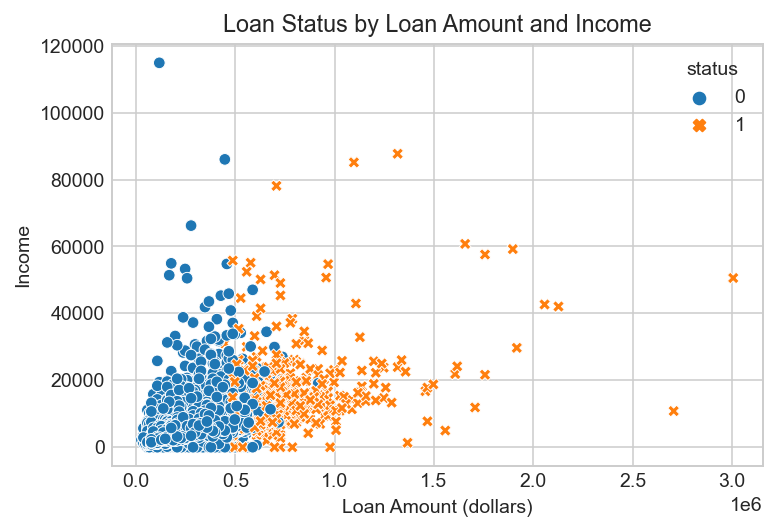

In [ ]:
#------------------------
# Create plot
#------------------------

# Make figure size
fig = plt.figure(dpi = 140)

# Plot df data
#---------------------
sns.scatterplot(data = dfLoans, x='loan_amount', y='income', hue='status', style = 'status')

# Label figure
plt.xlabel('Loan Amount (dollars)')
plt.ylabel('Income')
plt.title('Loan Status by Loan Amount and Income')

# Uncommment to save figure
#---------------------
plt.savefig('loanStatus.pdf', bbox_inches='tight', dpi= 300)

# Show the plot
#---------------------
plt.show()

## Add logistic and linear regression models
We can use both logistic and linear regression here to see how they differ along with plotting the data.

### Normalizing data

In order to get the algorithm to converge, it is helpful to rescale the data so that they are all more or less the same size.  We can do this by subtracting the mean of each input category (loan amount and income), and dividing by the standard deviation of that category.  The values of the estimated coefficients, $\theta_i$, must then also be rescaled to match the original unscaled variables.

In [ ]:
#------------------------
# Create normalized data and label variables
#------------------------

# Name the data
#------------------------
x1 = dfLoans['loan_amount'].values
x2 = dfLoans['income'].values

# Normalize data and relabel
#------------------------
normalized_x1 = (x1-np.mean(x1))/np.std(x1)
normalized_x2 = (x2-np.mean(x2))/np.std(x2)

# Data to import into functions
#------------------------
X = np.column_stack((normalized_x1,normalized_x2)) # our normalized x_1 and x_2 data in matrix form X=[x_1 x_2]
y = dfLoans['status'].values

### Logisitic regression model

We want to maximize the log likelihood function, so the cost function that we want to *minimize* is the negative of the log likelihood.

The update rule is
$$
\boldsymbol{\theta}^{(t+1)}=\boldsymbol{\theta}^{(t)}-\gamma^{(t)}  \nabla (- \ell) =\boldsymbol{\theta}^{(t)}+\gamma^{(t)}  \nabla \ell
$$

Note that, in the code, we are writing $\boldsymbol{\theta}$, the gradient vector $\nabla \ell$, and the input vector ${\bf x}^{(i)}$, as *column* vectors.

We note that since $\nabla \ell$ involves a sum, a large data set could result in large values of the partial derivatives.  To control the size of these entries, it is often helpful to use the *mean* log likelihood, ie. $\frac{1}{N} \nabla \ell$. This is what we recommend for this example.

Now, we start our logistic regression with the normalized data.

In [ ]:
#------------------------
# Create greadient function
#------------------------

# Create the gradient vector
#------------------------
def gradf(X,y, Theta):

    # Create Xtilde = column of ones merged with X
    N = len(y)
    X0 = np.ones((N,1))
    # Add column of ones to create matrix Xtilde
    Xtilde = np.column_stack((X0, X))

    # Compute scores via dot product
    scores = Xtilde@Theta # Nx1 vector

    # Compute probability function
    predictions = 1 / (1 + np.exp(-scores)) # Nx1

    # Compute gradient via dot product
    gradient = (y-predictions)@Xtilde # 1x3
    return gradient

#------------------------
# Parameters
#------------------------
N = len(y)

# Starting point
Theta = [0,0,0]

# Step size to move along gradient
gamma = 0.01

# initialize num of steps to take
totalNumSteps = 0
# create a max number of steps to take
maxSteps = 200000
# how close we want to be to f
tolerance = 0.000001
# initial difference between old and new theta values
diff = 100

#------------------------
# Gradient descent calcs
#------------------------

while((totalNumSteps < maxSteps)&(diff > tolerance)):

    # Calculate new (x,y) values - move along gradient to new (x,y) position
    newTheta = Theta + 1/N*gamma*gradf(X,y,Theta)

    # Calculate the difference between current and new (x,y) values
    diff = norm(newTheta-Theta,2)

    # Reassign current (x,y) to new (x,y)
    Theta = newTheta

    # Add 1 to counter for total number of steps
    totalNumSteps += 1

# Get thetas
#------------------------
scaled_theta0 = Theta[0]
scaled_theta1 = Theta[1]
scaled_theta2 = Theta[2]

# Calculuate unscaled thetas
#------------------------
theta0 = scaled_theta0 - scaled_theta1*np.mean(x1)/(np.std(x1)) - scaled_theta2*np.mean(x2)/(np.std(x2))
theta1 = scaled_theta1/(np.std(x1))
theta2 = scaled_theta2/(np.std(x2))

print('After', totalNumSteps,'timesteps, the thetas for our logistic regression model are:\ntheta0 =', theta0)
print('theta1 =', theta1)
print('theta2 =', theta2)

After 103680 timesteps, the thetas for our logistic regression model are:
theta0 = -11.40251461288322
theta1 = 2.0015309137058963e-05
theta2 = 1.9661671422563064e-07


### Linear regression model

In [ ]:
#------------------------
# Create normalized data and label variables
#------------------------

# Name the data
#------------------------
x1 = dfLoans['loan_amount'].values
x2 = dfLoans['income'].values
y = dfLoans['status'].values

# Normalize data and relabel
#------------------------
normalized_x1 = (x1-np.mean(x1))/np.std(x1)
normalized_x2 = (x2-np.mean(x2))/np.std(x2)

# Data to import into functions
#------------------------
X = np.column_stack((normalized_x1,normalized_x2))


#------------------------
# Create gradient function
#------------------------

# Create the gradient vector
# Here, we have \nabla D = 2\sum_{k=1}^N (\theta_1 x_k + \theta_0 - y_k)*<1, x_k>
def gradf(X, y, Theta):
    x1 = X[:,0]
    x2 = X[:,1]
    # divide up thetas
    theta0, theta1, theta2 = Theta
    N = len(y)
    # find derivatives w.r.t each theta
    deriv_theta0 = 2/N*sum(theta2*x2 + theta1*x1 + theta0 - y)
    deriv_theta1 = 2/N*sum(x1*(theta2*x2 + theta1*x1 + theta0 - y))
    deriv_theta2 = 2/N*sum(x2*(theta2*x2 + theta1*x1 + theta0 - y))
    # put in vector form
    gradient = np.array([deriv_theta0, deriv_theta1, deriv_theta2])
    return gradient

#------------------------
# Parameters
#------------------------

# Starting point
linTheta = np.array([0,0,0])

# Step size to move along gradient
gamma = 0.01

# initialize num of steps to take
totalNumSteps = 0
# create a max number of steps to take
maxSteps = 10000
# how close we want to be to f
tolerance = 0.000001
# initial difference between old and new theta values
diff = 100

#------------------------
# Gradient descent calcs
#------------------------

while((totalNumSteps < maxSteps)&(diff > tolerance)):

    # Calculate new (x,y) values - move along gradient to new (x,y) position
    newLinTheta = linTheta - gamma*gradf(X, y, linTheta)

    # Calculate the difference between current and new (x,y) values
    diff = norm(newLinTheta-linTheta,2)

    # Reassign current (x,y) to new (x,y)
    linTheta = newLinTheta

    # Add 1 to counter for total number of steps
    totalNumSteps += 1

# Get thetas
#------------------------
scaled_lintheta0 = linTheta[0]
scaled_lintheta1 = linTheta[1]
scaled_lintheta2 = linTheta[2]

# Calculuate unscaled thetas
#------------------------
lintheta0 = scaled_lintheta0 - scaled_lintheta1*np.mean(x1)/(np.std(x1)) - scaled_lintheta2*np.mean(x2)/(np.std(x2))
lintheta1 = scaled_lintheta1/(np.std(x1))
lintheta2 = scaled_lintheta2/(np.std(x2))

print('After', totalNumSteps,'timesteps, the thetas for our linear regression model are:\ntheta0 =', lintheta0)
print('theta1 =', lintheta1)
print('theta2 =', lintheta2)

After 769 timesteps, the thetas for our linear regression model are:
theta0 = -0.2511640664682505
theta1 = 1.1125996465532207e-06
theta2 = 3.728365911692775e-08


Now, we have our two models: the logistic model and the linear model to compare.

We can plot our new functions if we'd like.  We start by creating some values for loan amounts ($x_1$) and incomes ($x_2$).  Then, we create our log-likelihood function using our new thetas.

In [ ]:
# Pick the number of points to plot
#---------------------
n = 200

# Values to plot for our function
#---------------------
x1 = np.linspace(min(dfLoans['loan_amount']), max(dfLoans['loan_amount']), n)
x2 = np.linspace(min(dfLoans['income']), max(dfLoans['income']), n)

# Plug our values into our function log-likelihood function
# 1/(1+exp(-(theta0 + theta1*loanAmount = theta2*income)))
#---------------------
logModelPlot = lambda x1, x2: 1/(1+np.exp(-theta0 -theta1*x1 - theta2*x2))

We can setup to do the same for our linear model to compare.

In [ ]:
# Plug our values into our function linear function
# 1/(1+exp(-(theta0 + theta1*loanAmount = theta2*income)))
#---------------------
linModelPlot = lambda x1, x2: lintheta0 + lintheta1*x1 + lintheta2*x2

### Plot data with our models
Now, we will plot our data and our two regression lines: 1) logistic regression, 2) linear regression.

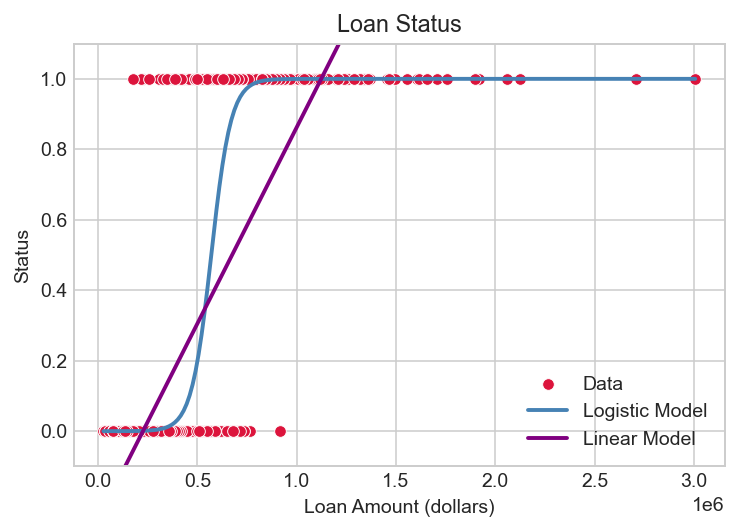

In [ ]:
#-----------------------------
# Plot our data and functions
#-----------------------------

# Make figure size
#---------------------
fig = plt.figure(dpi = 140)

# Plot data
#---------------------
sns.scatterplot(data = dfLoans, x = 'loan_amount', y = 'status', color='crimson', label = 'Data')
# Plot log model
plt.plot(x1, logModelPlot(x1,x2), '-', color = 'steelblue', linewidth = 2, label = 'Logistic Model')
# Plot linear model
plt.plot(x1, linModelPlot(x1,x2), '-', color = 'purple', linewidth = 2, label = 'Linear Model')

# Label axes + title
#---------------------
plt.xlabel('Loan Amount (dollars)')
plt.ylabel('Status')
plt.title('Loan Status')
plt.ylim(-0.1,1.1)

# Add legend
#---------------------
plt.legend()

# Uncommment to save figure
#---------------------
plt.savefig('loanStatusLogLinCompare.pdf', bbox_inches='tight', dpi= 300)

# Show the plot
#---------------------
plt.show()